Fai un programa en Python que coa imaxe escaneada:

- Identifica os cuadrilateros da imaxe.

- Conta o número de "circulos" e encerraos dentro dun cuadrilatero


	
Escaneo-cargador.jpg Escaneo-cargador.jpg

Número de cadriláteros detectados: 3
Número de círculos detectados: 3
Número de triángulos detectados: 1


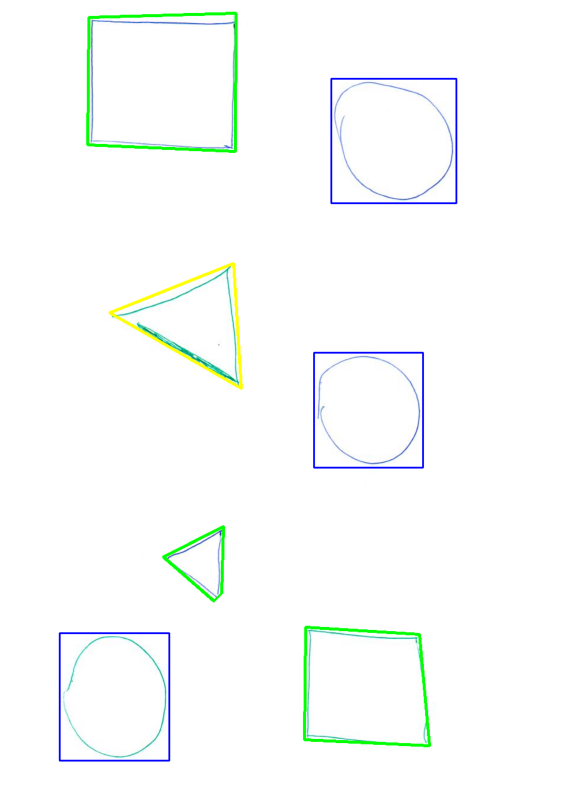

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('imaxes/ejopencv1.jpg', cv2.IMREAD_COLOR)
if image is None:
    raise ValueError("Non se puido cargar a imaxe. Verifica a ruta do ficheiro.")
crop_img = image[230:-230, 100:-230]
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 3)
kernel = np.ones((5, 5), np.uint8)
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel, iterations=2)
edges = cv2.Canny(gradient, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
square_count = 0
circle_count = 0
triangle_count = 0
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    if len(approx) == 3:
        triangle_count += 1
        cv2.drawContours(crop_img, [approx], 0, (0, 255, 255), 3)
    elif len(approx) == 4:
        square_count += 1
        cv2.drawContours(crop_img, [approx], 0, (0, 255, 0), 3)
    else:
        circle_count += 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(crop_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
print(f'Número de cuadrados detectados: {square_count}')
print(f'Número de círculos detectados: {circle_count}')
print(f'Número de triángulos detectados: {triangle_count}')
#El triangulo chiquito lo detecta como un cuadrado pero el resto lo detecta bien :(
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
